In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
customers=pd.read_csv("/content/Customers.csv")
products=pd.read_csv("/content/Products.csv")
transactions=pd.read_csv("/content/Transactions.csv")
print("Customers Dataset: \n", customers.head())
print("Products Dataset: \n", products.head())
print("Transactions Dataset: \n", transactions.head())

Customers Dataset: 
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset: 
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset: 
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T0016

In [27]:
print("Dataset Info")
print("Customers: ", customers.shape)
print("Products: ", products.shape)
print("Transactions: ", transactions.shape)
print("\nCustomers Info")
print(customers.info())
print("\nProducts Info")
print(products.info())
print("\nTransactions Info")
print(transactions.info())

Dataset Info
Customers:  (200, 4)
Products:  (100, 4)
Transactions:  (1000, 7)

Customers Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 ent

In [38]:
print("Missing Values")
print("Customers Missing Values:\n", customers.isnull().sum())
print("Products Missing Values:\n", products.isnull().sum())
print("Transactions Missing Values:\n", transactions.isnull().sum())
print("\nDuplicate Values")
print("Customers Duplicates:", customers.duplicated().sum())
print("Products Duplicates:", products.duplicated().sum())
print("Transactions Duplicates:", transactions.duplicated().sum())

Missing Values
Customers Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
Month              0
dtype: int64

Duplicate Values
Customers Duplicates: 0
Products Duplicates: 0
Transactions Duplicates: 0


In [29]:
print("Summary Statistics")
print("Customers Summary:\n", customers.describe(include="all"))
print("Products Summary:\n", products.describe(include="all"))
print("Transactions Summary:\n", transactions.describe())

Summary Statistics
Customers Summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products Summary:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN 

Customers Analysis
Unique Regions: 4
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


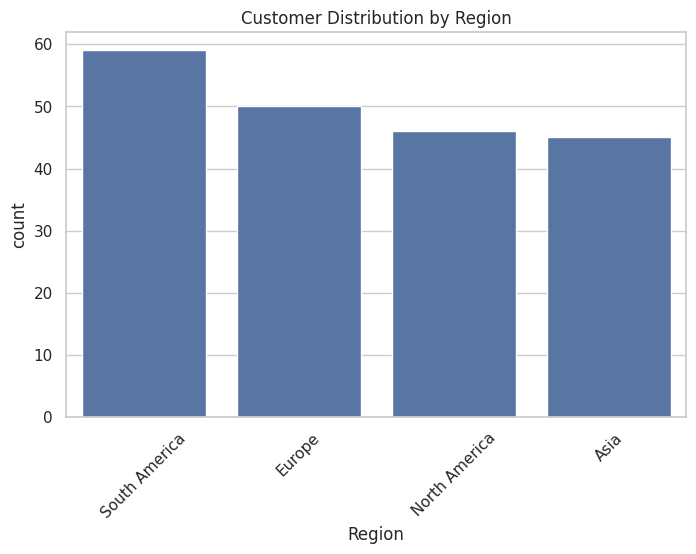

In [30]:
print("Customers Analysis")
print("Unique Regions:", customers['Region'].nunique())
print(customers['Region'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

Products Analysis
Unique Categories: 4
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


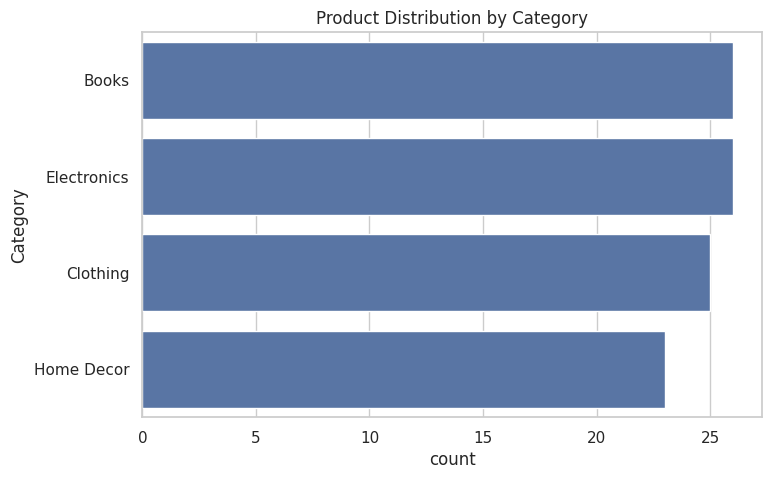

In [31]:
print("Products Analysis")
print("Unique Categories:", products['Category'].nunique())
print(products['Category'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.show()

In [32]:
print("Transactions Analysis")
print("Unique Customers in Transactions:", transactions['CustomerID'].nunique())
print("Unique Products Sold:", transactions['ProductID'].nunique())

Transactions Analysis
Unique Customers in Transactions: 199
Unique Products Sold: 100


Top 10 Products Sold:
 ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64


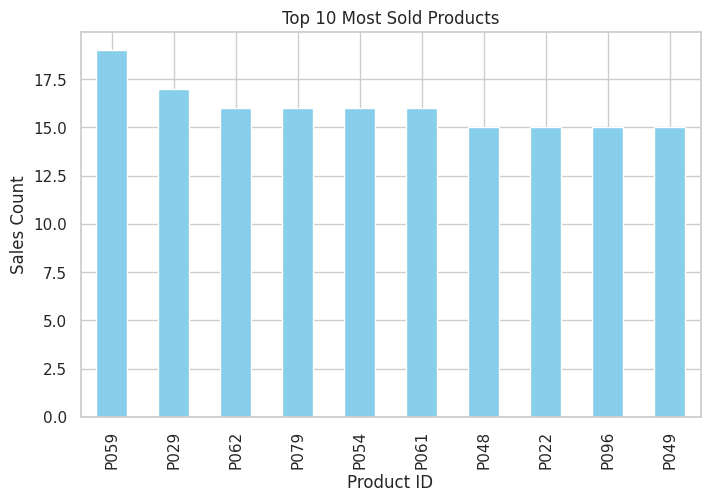

In [33]:
top_products=transactions['ProductID'].value_counts().head(10)
print("Top 10 Products Sold:\n", top_products)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product ID")
plt.ylabel("Sales Count")
plt.show()


Total Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


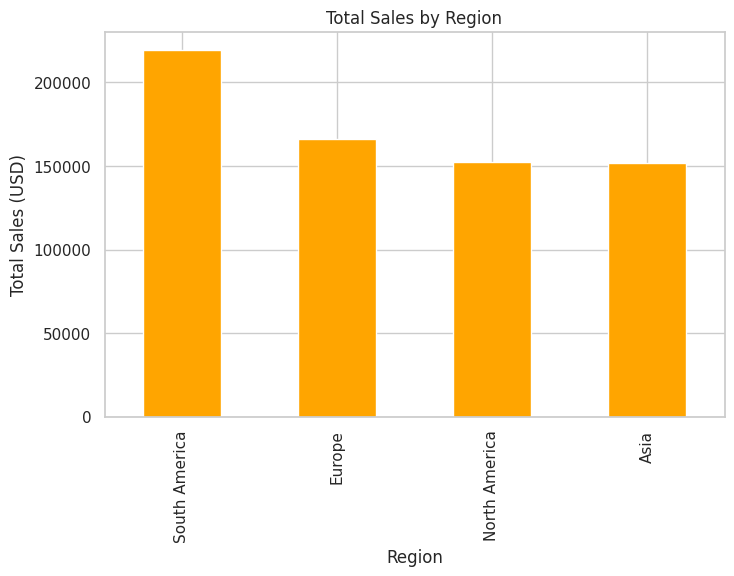

In [34]:
transactions=transactions.merge(customers, on='CustomerID', how='left')
total_sales_region=transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:\n", total_sales_region)
plt.figure(figsize=(8, 5))
total_sales_region.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.show()

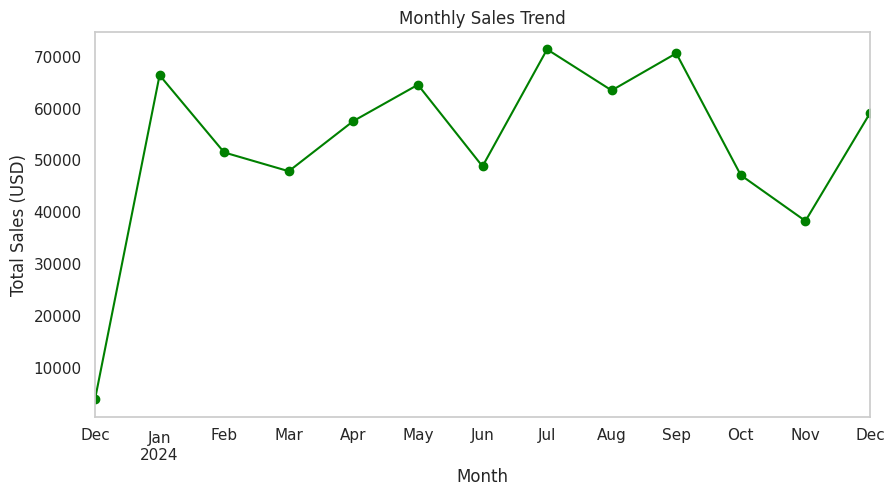

In [35]:
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])
transactions['Month']=transactions['TransactionDate'].dt.to_period('M')
monthly_sales=transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()


Top Spending Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


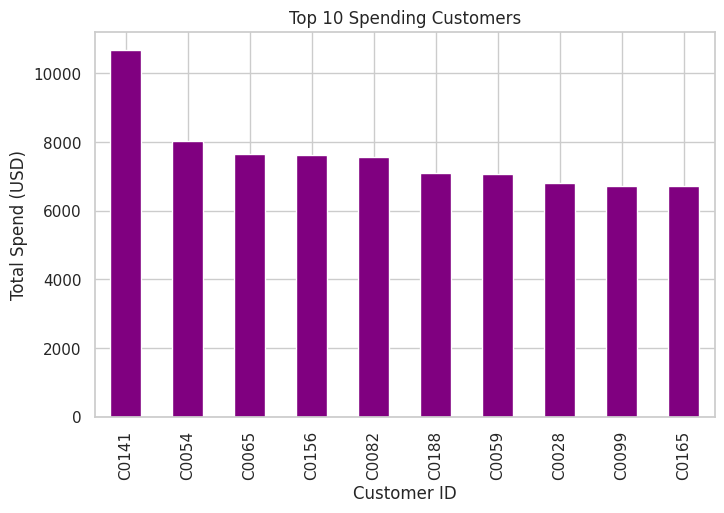

In [36]:
top_customers=transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop Spending Customers:\n", top_customers)
plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='purple')
plt.title("Top 10 Spending Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (USD)")
plt.show()